# Introduction
## NSCI 801 - Quantitative Neuroscience

Gunnar Blohm

### Outline

* Why quantitative Neuroscience?
* Course overview & materials
* The research process
* Study design


### Why Quantitative Neuroscience?

* We want to quantify observations
* But data is corrupted by noise
* Certain things are not directly observable (latent)
    + we need models!
* Ultimately we want to identify **_causal_** relationships

### Why Quantitative Neuroscience?

* We want to quantify observations
    - questionnaires
    - measurements
    
But: such observations are variable...

### Why Quantitative Neuroscience?

* We want to quantify observations
* But data is corrupted by noise
    - noise in the process / system
    - noise due to the measurement
    - noise due to A/D conversion
    - noise due to post-processing

Thus: we need ways to infer reality from noisy data

### Why Quantitative Neuroscience?

* We want to quantify observations
* But data is corrupted by noise
* Certain things are not directly observable (latent)
    - e.g. we cannot measure your thought process (yet), only the outcome!
    - e.g. we cannot measure inflammation, only the body's reaction
    - we often want good "measures" of latent variables
* Ultimately we want to identify **_causal_** relationships

Solution: we need models that causally link latent variables to measurable quantities

### Course overview & materials

* [course web site](http://www.compneurosci.com/NSCI801.html)
* we will use Google Colab - you need a Google account!
* all lecture materials will be in Python & Markdown
* slides / tutorials will be shared on [GitHub](https://github.com/BlohmLab/NSCI801-QuantNeuro)...
* download code from Github into Colab: File>>Open Notebook>>Github...

### for those interested...

* Jupyter Notebook has a "slide" option that produces HTML5 slides
    - [read more about it](https://medium.com/@mjspeck/presenting-code-using-jupyter-notebook-slides-a8a3c3b59d67)
* install Reveal.js - Jupyter/IPython Slideshow Extension (RISE)
    - [install and use](https://rise.readthedocs.io/en/maint-5.5/index.html)
    
But you **don't** need any of this!

### Course overview & materials

#### Goals of the course:
* hands-on skills in signal processing, basic and advanced statistics, data neuroscience (machine learning) and model fitting methods
* gain intuitive understanding of these topics
* introduction to scientific programming in Python
* familiarization with open science framework approaches

### Course overview & materials

#### [Specific topics](http://www.compneurosci.com/NSCI801.html):
* intro to Python & Colab
* signal processing
* statistics and hypothesis testing
* models & data neuroscience
* causality, reproducibility, Open Science

### The research process

![process](stuff/research-process.png)

### The research process

#### Research design:
* what is power?
* what is effect size?
* how to determine sample size?


### The research process

#### Research design:
* what is power?

    Power calculations tell us how many samples are required in order to avoid a type I (false positive) or a type II (false negative) error
    
    Typically in hypothesis testing, only type II errors are considered: For a type II error probability of $\beta$, the corresponding statistical power is $1 − \beta$




### The research process

#### Research design:
* what is effect size?

    Quantification of the difference between two groups
    
    E.g. Cohen $\color{grey}{d=\frac{\mu_1-\mu_2}{\sigma}}$
    
![effect-size](stuff/effect-size.png)

### The research process

#### Let's play - effect size

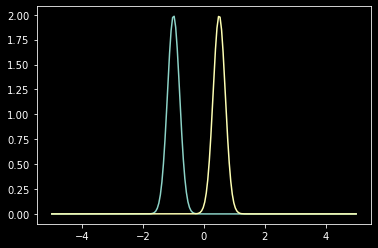

Effect size d = 7.5


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

plt.style.use('dark_background') 

x = np.linspace(-5, 5, 200)
mu1 = -1
sigma = .2
plt.plot(x, stats.norm.pdf(x, mu1, sigma))
mu2 = .5
sigma = .2
plt.plot(x, stats.norm.pdf(x, mu2, sigma))
plt.show()
print("Effect size d =", abs((mu1-mu2)/sigma))

### The research process

#### Let's play - random samples

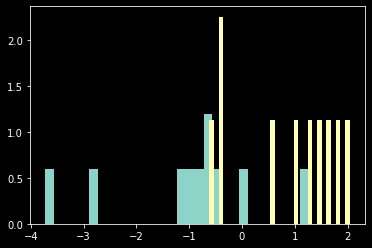

In [2]:
mu1 = -1
mu2 = 1
sigma = 1
N = 10 # number samples
s1 = np.random.normal(mu1, sigma, N)
s2 = np.random.normal(mu2, sigma, N)
plt.hist(s1, 30, density=True)
plt.hist(s2, 30, density=True)
plt.show()

### The research process

#### Research design:

* how to determine sample size? (aka power calculations)
    
    - you essentially simulate your statistical analysis
    - you need to make meaningful assumptions, e.g. group difference, variability, power
    - you want to know how many samples you need so that you can reliably identify the hypothesized effect

* many tools available, e.g. [G*Power](http://www.gpower.hhu.de/), [WebPower online](https://webpower.psychstat.org/wiki/), [powerandsamplesize.com](powerandsamplesize.com), ...
* for Python: [StatsModels package](http://www.statsmodels.org/stable/index.html)

### The research process

#### Research design - let's compute sample size

This is for a repeated measures t-test...

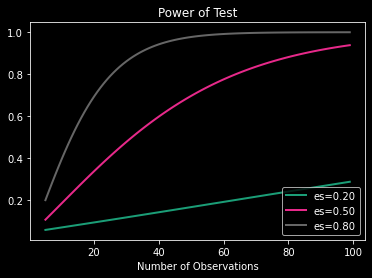

In [4]:
from numpy import array
from statsmodels.stats.power import TTestIndPower
# from statsmodels.stats.power import TTestIndPower

# parameters for power analysis
effect_sizes = array([0.2, 0.5, 0.8])
sample_sizes = array(range(5, 100))
# calculate power curves from multiple power analyses
analysis = TTestIndPower() # or TTestIndPower for independent samples
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
plt.show()

**What does this mean?**

* Power is the probability of rejecting the null hypothesis when, in fact, it is false.
* Power is the probability of making a correct decision (to reject the null hypothesis) when the null hypothesis is false.
* Power is the probability that a test of significance will pick up on an effect that is present.
* Power is the probability that a test of significance will detect a deviation from the null hypothesis, should such a deviation exist.
* Power is the probability of avoiding a Type II error.
* Simply put, power is the probability of not making a Type II error

### The research process

![science progress](stuff/higgins-science-creationism.png)

### The research process

#### Hypothesis testing:
* parametric
* non-parametric
* Bayesian
* model-based
* ...

More later!


### The research process

#### Pearl's research flow
![Pearl](stuff/Pearl-flow.png)

Pearl & Mackenzie, “The book of why”, 2018

### Further readings

* [A review of statistical concepts](http://www.sagepub.com/upm-data/49259_ch_1.pdf)
* [Bruno Olshausen's probability primer](http://www.rctn.org/bruno/npb163/probability.pdf)
* [Handbook of Biological Statistics - Power analysis](http://www.biostathandbook.com/power.html)
* [Introduction to Power analysis in Python](https://towardsdatascience.com/introduction-to-power-analysis-in-python-e7b748dfa26)